In [10]:
import sys
import numpy as np
import itertools
from platypus import Real
import matplotlib.pyplot as plt
import os

sys.path.append(os.path.abspath(".."))

In [11]:
import rbf.rbf_functions as rbf_functions

rbfs = [
    rbf_functions.squared_exponential_rbf,
    rbf_functions.original_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

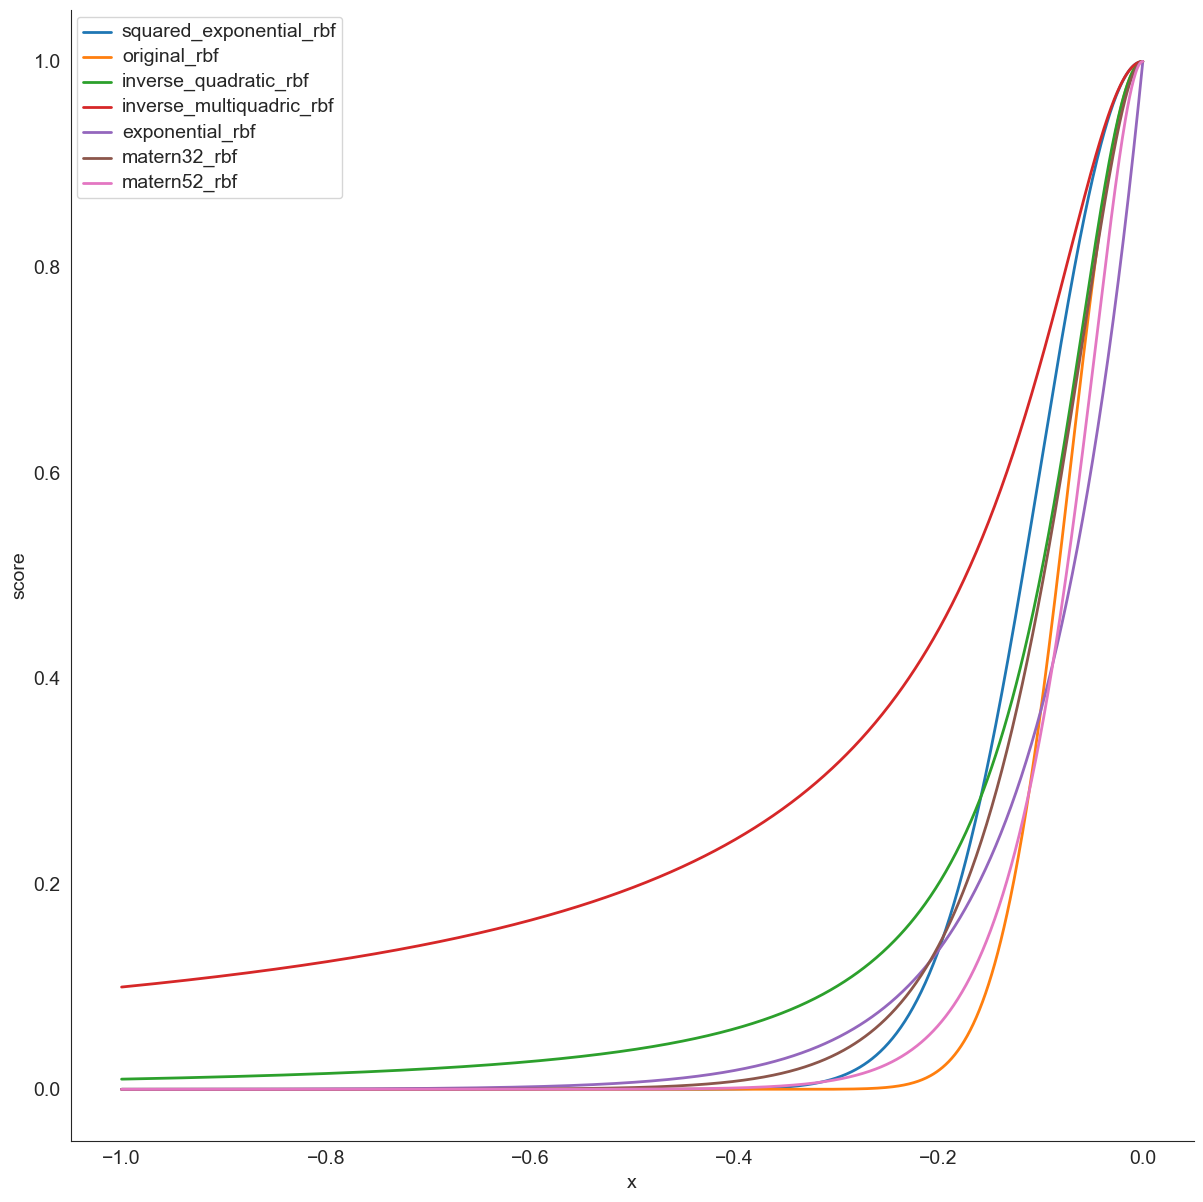

In [19]:
centers = np.array(
    [
        [
            0.0,
        ],
        [
            0.0,
        ],
        [
            0.0,
        ],
    ]
)
radii = np.array([[0.1], [0.1], [0.1]])
weights = np.array([[1 / 3], [1 / 3], [1 / 3]])

rbf_input = np.array(
    [
        0,
    ]
)

rbf_functions.exponential_rbf(rbf_input, centers, radii, weights)

# setup a grid for the inputs
grid_size = 1001
x = np.linspace(-1, 0, grid_size)

# run the rbf for each point

scores = {}
for function in rbfs:
    scores[function.__name__] = np.empty(x.shape)

for i, x_i in enumerate(x):
    rbf_input = np.array(
        [
            x_i,
        ]
    )
    # run RBF

    for function in rbfs:
        score = function(rbf_input, centers, radii, weights)
        scores[function.__name__][i] = score

# visualize results
plt.rcParams["figure.figsize"] = [12, 12]

sns.set_style("white")
colors = sns.color_palette()

fig, ax = plt.subplots()
for i, (k, score) in enumerate(scores.items()):
    ax.plot(x, score, c=colors[i], lw=2, label=k)
    ax.set_xlabel("x")
    ax.set_ylabel("score")
    fig.tight_layout()
    sns.despine()
ax.legend()
change_fontsize(fig, 14)
# plt.locator_params(axis='y', nbins=2)
# plt.locator_params(axis='x', nbins=3)

# plt.savefig(f'{k}_shape.pdf')
# plt.show()

In [17]:
?change_fontsize

Signature: change_fontsize(fig, fs=14)
Docstring: Change fontsize of figure items to specified size
File:      ~/Documents/GitHub/scratchpad/kernel_config.py
Type:      function


FileNotFoundError: [Errno 2] No such file or directory: 'figs/single_rbf/original_rbf_0.97.png'

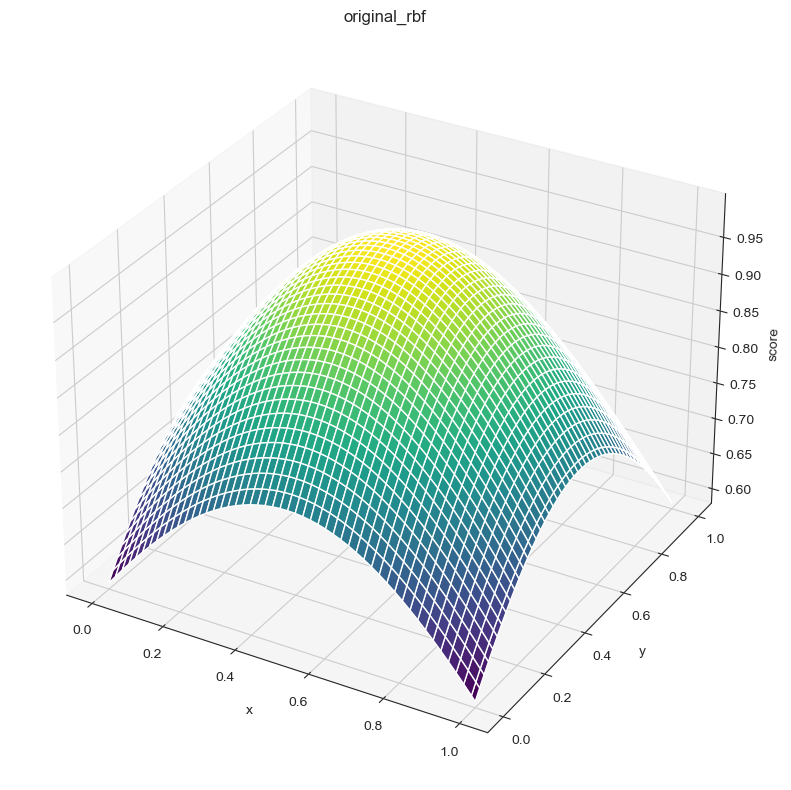

In [8]:
# rbfs = [rbf_functions.original_rbf, rbf_functions.inverse_multiquadric_rbf, rbf_functions.exponential_rbf]
rbfs = [rbf_functions.original_rbf]
# rbfs = [rbf_functions.inverse_multiquadric_rbf]
# rbfs = [rbf_functions.exponential_rbf]
centers = np.array(
    [
        #                     [0.25, 0.25],
        [0.5, 0.5],
        #                     [0.75, 0.75]
    ]
)
# radii = np.array([[0.1, 0.1],
#                   [0.1, 0.1],
#                   [0.1, 0.1]
#                  ])
e = 0.97
radii = np.array(
    [
        [e, e],
        #                   [e, e],
        #                   [e, e]
    ]
)
weights = np.array([[1 / 3], [1 / 3], [1 / 3]])
# weights = [[10]]

rbf_input = np.array([0, 0])
# centers = np.array([[0.5, 0.5]])
# radii = np.array([[0.1, 0.1]])
# weights = np.array([[1]])

# rbf_functions.exponential_rbf(rbf_input, centers, radii, weights)

# setup a grid for the inputs
grid_size = 100
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)

X, Y = np.meshgrid(x, y)

# run the rbf for each point

scores = {}
for function in rbfs:
    scores[function.__name__] = np.empty(X.shape)

for i in range(grid_size):
    for j in range(grid_size):
        rbf_input = np.array([X[i, j], Y[i, j]])
        # run RBF

        for function in rbfs:
            score = function(rbf_input, centers, radii, weights)
            scores[function.__name__][i, j] = score

# visualize results
plt.rcParams["figure.figsize"] = [8, 8]
for k, score in scores.items():
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.plot_surface(X, Y, score, cmap="viridis", edgecolor="white")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("score")
    ax.set_title(k)
    fig.tight_layout()
    plt.savefig(f"figs/single_rbf/{k}_{e}.png")
    plt.show()

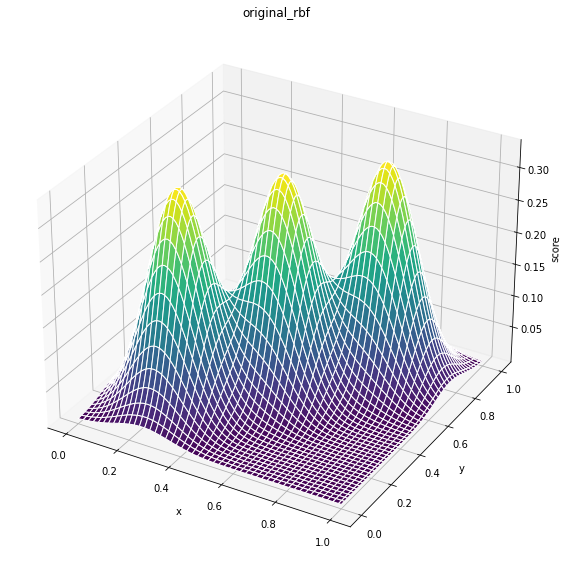

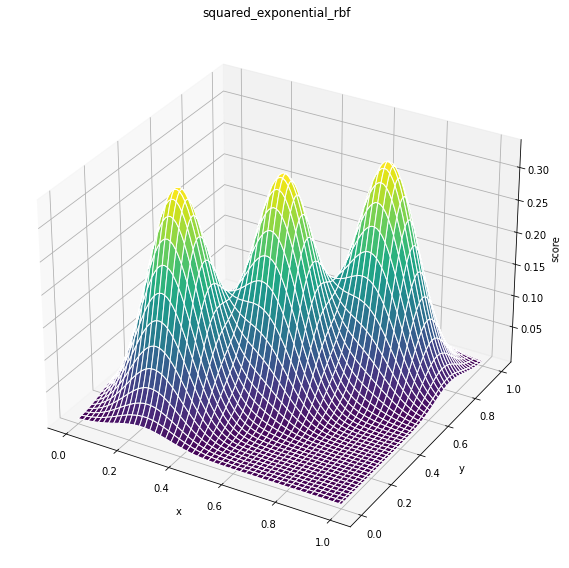

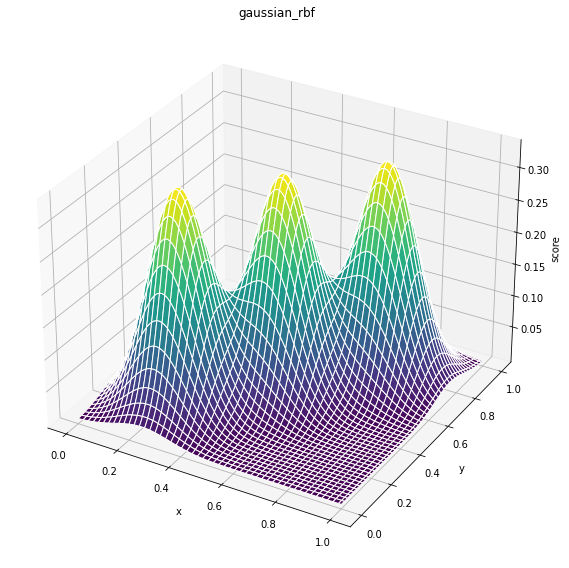

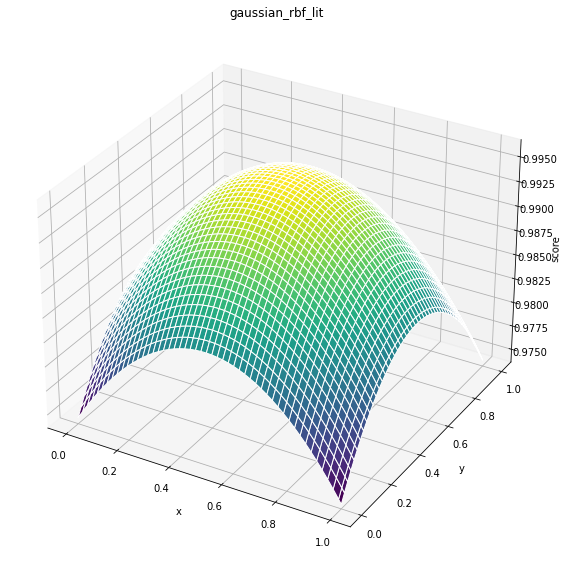

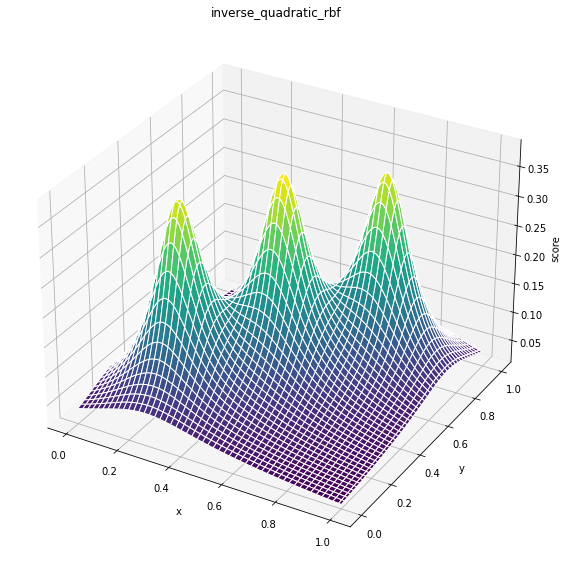

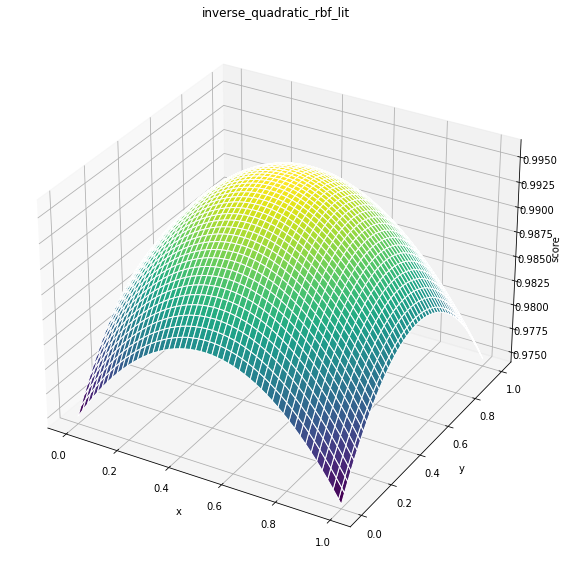

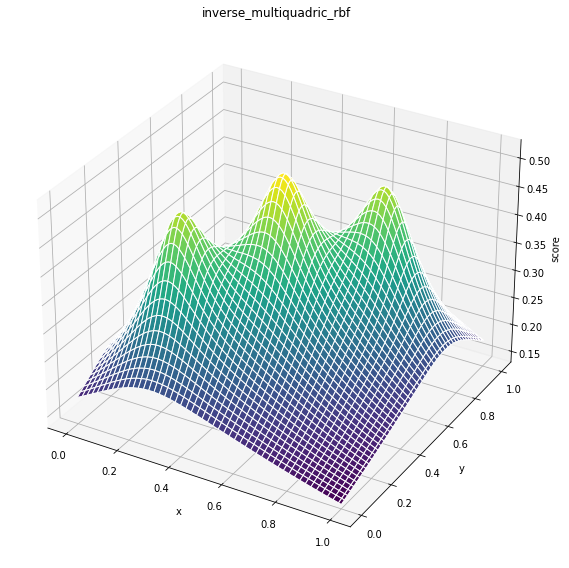

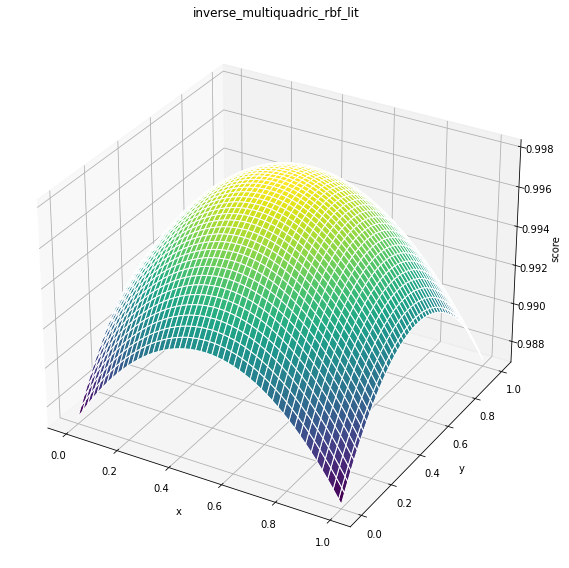

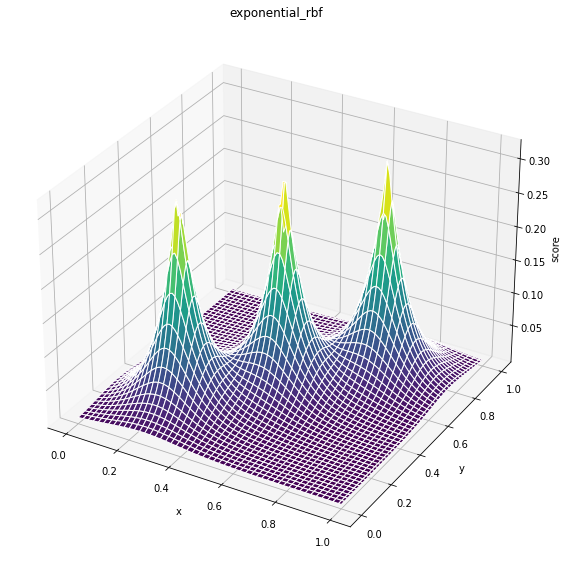

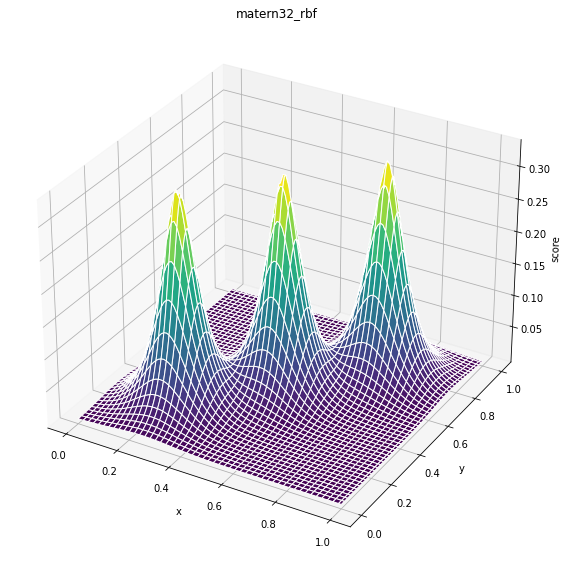

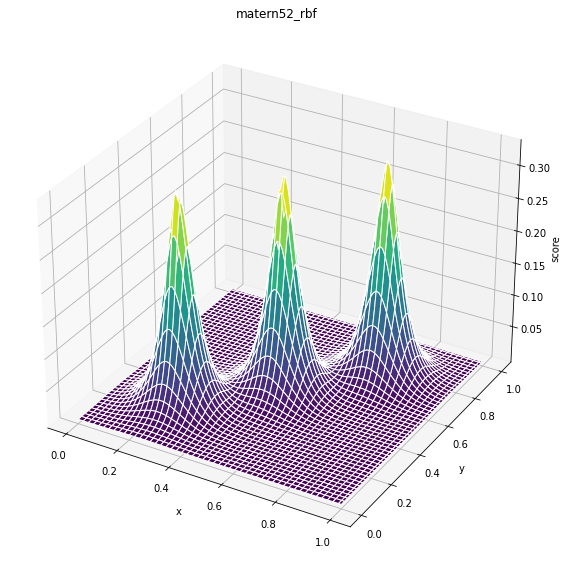

In [33]:
centers = np.array([[0.25, 0.25], [0.5, 0.5], [0.75, 0.75]])
# radii = np.array([[0.1, 0.1],
#                   [0.1, 0.1],
#                   [0.1, 0.1]
#                  ])
e = 0.15
radii = np.array([[e, e], [e, e], [e, e]])
weights = np.array([[1 / 3], [1 / 3], [1 / 3]])
# weights = [[1]]

rbf_input = np.array([0, 0])
# centers = np.array([[0.5, 0.5]])
# radii = np.array([[0.1, 0.1]])
# weights = np.array([[1]])

rbf_functions.exponential_rbf(rbf_input, centers, radii, weights)

# setup a grid for the inputs
grid_size = 100
x = np.linspace(0, 1, grid_size)
y = np.linspace(0, 1, grid_size)

X, Y = np.meshgrid(x, y)

# run the rbf for each point

scores = {}
for function in rbfs:
    scores[function.__name__] = np.empty(X.shape)

for i in range(grid_size):
    for j in range(grid_size):
        rbf_input = np.array([X[i, j], Y[i, j]])
        # run RBF

        for function in rbfs:
            score = function(rbf_input, centers, radii, weights)
            scores[function.__name__][i, j] = score

# visualize results
plt.rcParams["figure.figsize"] = [8, 8]
for k, score in scores.items():
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    ax.plot_surface(X, Y, score, cmap="viridis", edgecolor="white")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("score")
    ax.set_title(k)
    fig.tight_layout()
    plt.savefig(f"figs/rbftest_new/{k}_{e}.png")
    plt.show()

# RBF output tests

In [41]:
Theta = np.array(
    [
        -0.589524547783965,
        0.48682086719207174,
        0.8824814917757433,
        0.2651838053863035,
        0.27877586333223814,
        0.889154065602996,
        0.656381523687032,
        0.05674319938258976,
        -0.013955775419352001,
        0.6115821445033877,
        -0.1362439855782438,
        0.6216487273153675,
        0.4987019714790798,
        0.4183267997505976,
        0.9767718952298922,
        0.533130692595658,
        -0.26275158159727297,
        0.7092726153594651,
        0.09046642636516355,
        0.569617471273791,
        0.7912599758176031,
        0.9048006708469966,
        0.611387827092729,
        0.12278436114206126,
        -0.2893048246251353,
        0.5853361419230902,
        -0.06202634665205298,
        0.8444312844467061,
        0.6517878452139317,
        0.7404472140344134,
        0.2203309959555919,
        0.8621904320357701,
    ]
)
print(f"# decision vars: {len(Theta)}")
numberOfInputs = 2
numberOfOutputs = 4
numberOfRBF = 4
inputl = np.asarray([0.53, 0.75])

# decision vars: 32


In [42]:
def set_parameters(Theta):
    idk = 2 * numberOfInputs - 1
    count = 0
    ws = np.zeros((numberOfOutputs, 1))
    param = []
    cparam = {"c": [], "b": [], "w": []}
    for i in range(0, numberOfRBF):
        for k in range(0, numberOfOutputs):
            idk = idk + 1
            ws[k][0] = ws[k][0] + Theta[idk]
        idk = idk + 2 * numberOfInputs
    for l in range(numberOfRBF):
        for j in range(numberOfInputs):
            #             center[l][j] = Theta[count]
            #             radius[l][j] = Theta[count + 1]
            cparam["c"].append(Theta[count])
            cparam["b"].append(Theta[count + 1])
            count = count + 2

        for k in range(numberOfOutputs):
            if ws[k][0] < 10**-6:
                #                 weights[l][k] = Theta[count]
                cparam["w"].append(Theta[count])
            else:
                #                 weights[l][k] = Theta[count] / ws[k]
                cparam["w"].append(Theta[count] / ws[k])
            count = count + 1
        param.append(cparam)
        cparam = {"c": [], "b": [], "w": []}
    return param  # center, radius, weights


def RBFcontrol_law(input):
    phi = []
    for j in range(numberOfRBF):
        bf = 0
        for i in range(numberOfInputs):
            numerator = input[i] - param[j]["c"][i]  # centers
            denominator = param[j]["b"][i]  # radius
            if denominator < 1e-6:
                denominator = 1e-6
            bf += (numerator * numerator) / (denominator * denominator)
        phi.append(np.exp(-bf))
    #     print(phi)
    out = []
    for k in range(numberOfOutputs):
        o = 0
        for i in range(numberOfRBF):
            o = o + param[i]["w"][k] * phi[i]
        out.append(o)
    return out


param = set_parameters(Theta)
output = RBFcontrol_law(inputl)
outputl = [item for sublist in output for item in sublist]
print(f"output: {outputl}")

output: [0.056982337379412114, 0.04661259177939901, 0.04819390639645883, 0.056710963245583126]


In [43]:
def set_parameters2(Theta):
    Theta = Theta.reshape((-1, 4))
    centerradius = Theta[::2]
    weights = Theta[1::2]
    center = centerradius[:, ::2]
    radius = centerradius[:, 1::2]

    ws = weights.sum(axis=0)
    for i in [np.where(ws == i)[0][0] for i in ws if i > 10**-6]:
        weights[:, i] = weights[:, i] / ws[i]
    return center, radius, weights


def rbf_control_law2(inputRBF):
    center, radius, weights = set_parameters2(Theta)
    phi = squaredExponential(inputRBF, center, radius)
    #     phi = gaussian(inputRBF, center, radius)
    #     phi = invQuadric(inputRBF, center, radius)
    out = (weights * (phi.reshape(numberOfRBF, 1))).sum(axis=0)
    return out


def squaredExponential(inputRBF, center, radius):
    return np.exp(-(np.sum((inputRBF - center) ** 2 / (radius**2), axis=1)))


def squaredExponential2(inputRBF, center, radius):
    return np.exp(-(np.sum((inputRBF - center) ** 2 / (2 * radius**2), axis=1)))


def gaussian(inputRBF, center, radius):
    return np.exp(-(np.sum((radius * (inputRBF - center)) ** 2, axis=1)))


def invQuadric(inputRBF, center, radius):
    return 1 / (1 + np.sum((radius * (inputRBF - center)) ** 2, axis=1))


output2 = rbf_control_law2(inputl)
print(f"rbf output: {list(output2)}")

rbf output: [0.056982337379412114, 0.04661259177939901, 0.04819390639645883, 0.056710963245583126]


In [44]:
from scipy.spatial.distance import cdist


def squared_exponential_rbf(rbf_input, centers, radii, weights):
    # sum over inputs
    a = rbf_input[np.newaxis, :] - centers
    b = a**2
    c = radii**2
    rbf_scores = np.exp(-(np.sum(b / c, axis=1)))
    # n_rbf x n_output, n_rbf
    weighted_rbfs = weights * rbf_scores[:, np.newaxis]
    output = weighted_rbfs.sum(axis=0)
    return output


def squared_exponential_rbf_euc(rbf_input, centers, radii, weights):
    # sum over inputs
    a = cdist(rbf_input[np.newaxis, :], centers)
    b = a.T**2
    c = radii**2
    rbf_scores = np.exp(-(np.sum(b / c, axis=1)))
    # n_rbf x n_output, n_rbf
    weighted_rbfs = weights * rbf_scores[:, np.newaxis]
    output = weighted_rbfs.sum(axis=0)
    return output


def gaussian_rbf(rbf_input, centers, radii, weights):
    a = rbf_input[np.newaxis, :] - centers
    n = a / radii
    p = n**2
    q = np.sum(p, axis=1)
    rbf_scores = np.exp(-1 * q)

    # n_rbf x n_output, n_rbf
    weighted_rbfs = weights * rbf_scores[:, np.newaxis]
    output = weighted_rbfs.sum(axis=0)
    return output


def gaussian_rbf_euc(rbf_input, centers, radii, weights):
    a = cdist(rbf_input[np.newaxis, :], centers)
    n = a.T / radii
    p = n**2
    q = np.sum(p, axis=1)
    rbf_scores = np.exp(-1 * q)

    # n_rbf x n_output, n_rbf
    weighted_rbfs = weights * rbf_scores[:, np.newaxis]
    output = weighted_rbfs.sum(axis=0)
    return output

In [46]:
def calc_types(numberOfInputs, numberOfOutputs, numberOfRBF, Theta):
    types = []
    c_i = []
    r_i = []
    w_i = []
    count = itertools.count()
    for i in range(numberOfRBF):
        for j in range(numberOfInputs):
            types.append(Real(-1, 1))  # center
            c_i.append(next(count))
            types.append(Real(0, 1))  # radius
            r_i.append(next(count))

    for _ in range(numberOfRBF):
        for _ in range(numberOfOutputs):
            types.append(Real(0, 1))  # weight
            w_i.append(next(count))  # weight
    c_i = np.asarray(c_i, dtype=np.int16)
    r_i = np.asarray(r_i, dtype=np.int16)
    w_i = np.asarray(w_i, dtype=np.int16)
    return c_i, r_i, w_i


def calc_param(numberOfInputs, numberOfOutputs, numberOfRBF, Theta, rbf):
    #     c_i, r_i, w_i = calc_types(numberOfInputs, numberOfOutputs, numberOfRBF, Theta, rbf)
    c_i = np.asarray([0, 2, 8, 10, 16, 18, 24, 26], dtype=np.int16)
    r_i = np.asarray([1, 3, 9, 11, 17, 19, 25, 27], dtype=np.int16)
    w_i = np.asarray(
        [4, 5, 6, 7, 12, 13, 14, 15, 20, 21, 22, 23, 28, 29, 30, 31], dtype=np.int16
    )
    decision_vars = Theta.copy()

    centers = decision_vars[c_i].reshape((numberOfRBF, numberOfInputs))
    radii = decision_vars[r_i].reshape((numberOfRBF, numberOfInputs))
    weights = decision_vars[w_i].reshape((numberOfRBF, numberOfOutputs))

    # sum of weights per input is 1
    weights /= weights.sum(axis=0)[np.newaxis, :]
    return centers, radii, weights

In [58]:
dvars = np.arange(1, 33)
calc_types(2, 4, 4, dvars)

(array([ 0,  2,  4,  6,  8, 10, 12, 14], dtype=int16),
 array([ 1,  3,  5,  7,  9, 11, 13, 15], dtype=int16),
 array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int16))

In [73]:
entry = rbf_functions.squared_exponential_rbf
rbf = rbf_functions.RBF(
    numberOfRBF, numberOfInputs, numberOfOutputs, rbf_function=entry
)
inp_c, inp_r, inp_w = calc_param(
    numberOfInputs, numberOfOutputs, numberOfRBF, Theta, rbf
)
print(squared_exponential_rbf(inputl, inp_c, inp_r, inp_w))
print(squared_exponential_rbf_euc(inputl, inp_c, inp_r, inp_w))

[0.05698234 0.04661259 0.04819391 0.05671096]
[0.00331737 0.00267342 0.00275498 0.00324307]


In [74]:
entry = rbf_functions.gaussian_rbf
rbf = rbf_functions.RBF(
    numberOfRBF, numberOfInputs, numberOfOutputs, rbf_function=entry
)
inp_c, inp_r, inp_w = calc_param(
    numberOfInputs, numberOfOutputs, numberOfRBF, Theta, rbf
)
print(gaussian_rbf(inputl, inp_c, inp_r, inp_w))
print(gaussian_rbf_euc(inputl, inp_c, inp_r, inp_w))

[0.05698234 0.04661259 0.04819391 0.05671096]
[0.00331737 0.00267342 0.00275498 0.00324307]
